In this example, we demostrate how to get a skyrmion lattice using MicroMagnetic.jl. We use the parameters given in PRL **108** 017206 (2012), which is dimensionless.

In [1]:
using MicroMagnetic
using CairoMakie

function m0_fun(i, j, k, dx, dy, dz)
    i0, j0, r = 166, 96, 25
    i1 = i % i0
    j1 = j % j0

    if ((i1 - r)^2 + (j1 - r)^2 < r^2)
        return (0.05, 0.01, -1)
    elseif ((i1 - i0 / 2.0 - r)^2 + (j1 - j0 / 2.0 - r)^2 < r^2)
        return (0.05, 0.01, -1)
    end

    return (0, 0, 1)
end

function relax_system()
    mesh = CubicMesh(; nx=166 * 2, ny=96 * 3, nz=1, pbc="xy")
    sim = Sim(mesh; driver="SD", name="skx_latttice")
    set_mu_s(sim, 1.0)

    #Set the exchange, dmi and zeeman
    add_exch(sim, 1.0; name="exch")
    add_zeeman(sim, (0, 0, 3.75e-3))
    add_dmi(sim, 0.09; name="dmi")

    init_m0(sim, m0_fun)
    relax(sim; max_steps=2000, stopping_dmdt=1e-5)

    save_vtk(sim, "skx_latttice.vts")

    return sim
end

relax_system (generic function with 1 method)

Recall the function `relax_system` to obtain the skyrmion lattice.

In [2]:
sim = relax_system();

[ Info: AtomisticSim has been created.
[ Info: Static Zeeman has been added.
[ Info: Bulk DMI for CubicMesh has been added!
[ Info: Running Driver : MicroMagnetic.EnergyMinimization{Float64}.
[ Info: max_dmdt is less than stopping_dmdt=1e-05 @steps=231, Done!


After obtain the skyrmion, we use the following script to plot the skyrmion

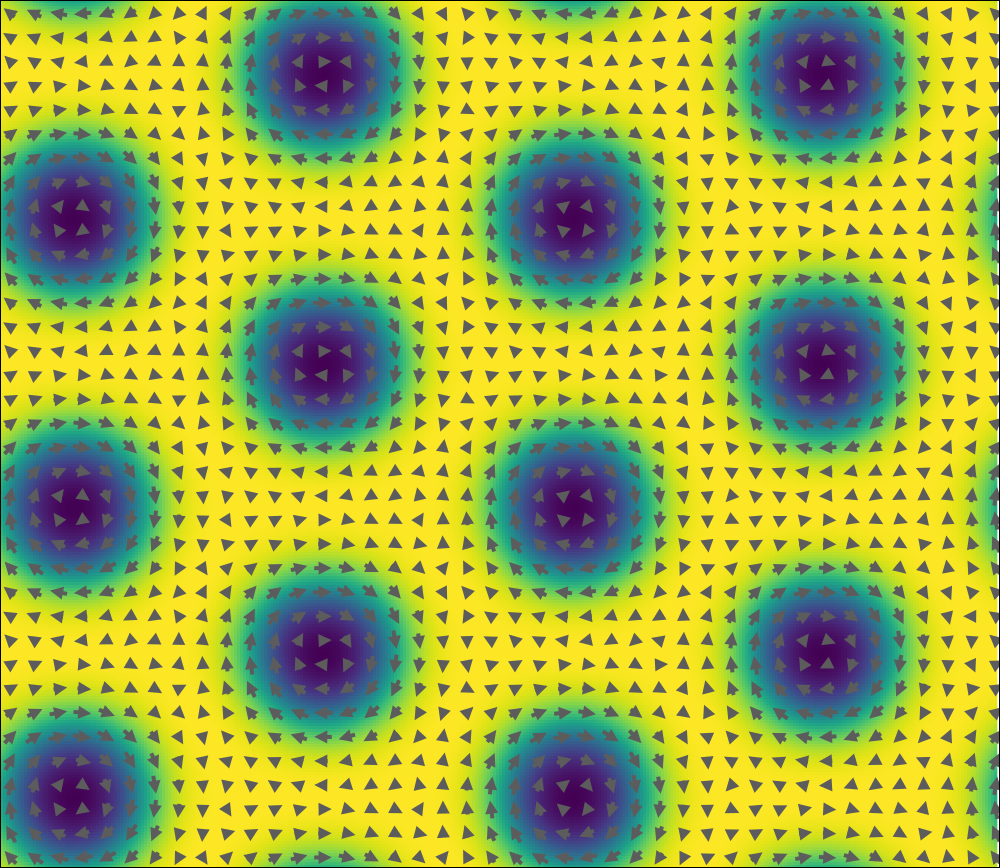

In [3]:
plot_m(sim)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*